# Chapter 4 - Clustering Models
## Segment 2 - Hierarchial methods

### Setting up for clustering analysis

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm


In [6]:
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [7]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [9]:
address = 'C:/Users/imran/OneDrive/Documents/GitHub/pythonLinkedIn/pythonWithLinkedIn/DS Essential Training 2/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb' ]

x = cars[['mpg', 'disp', 'hp', 'wt']].values
y = cars.iloc[:,(9)].values

## Using scipy to generate dendrograms

In [11]:
z = linkage(x, 'ward')
z

array([[  0.    ,   1.    ,   0.255 ,   2.    ],
       [ 11.    ,  12.    ,   0.9621,   2.    ],
       [  9.    ,  10.    ,   1.4   ,   2.    ],
       [ 13.    ,  33.    ,   1.9103,   3.    ],
       [ 17.    ,  25.    ,   5.1157,   2.    ],
       [ 20.    ,  26.    ,   7.5097,   2.    ],
       [  6.    ,  23.    ,  10.0535,   2.    ],
       [ 19.    ,  36.    ,  10.1666,   3.    ],
       [ 21.    ,  22.    ,  14.0035,   2.    ],
       [  2.    ,  37.    ,  14.1771,   3.    ],
       [ 14.    ,  15.    ,  15.6215,   2.    ],
       [ 18.    ,  39.    ,  16.7875,   4.    ],
       [ 31.    ,  41.    ,  19.8678,   4.    ],
       [ 32.    ,  34.    ,  21.6097,   4.    ],
       [ 28.    ,  38.    ,  22.5473,   3.    ],
       [  8.    ,  44.    ,  29.8447,   5.    ],
       [  3.    ,   5.    ,  33.5403,   2.    ],
       [ 16.    ,  42.    ,  38.201 ,   3.    ],
       [  4.    ,  24.    ,  40.0052,   2.    ],
       [ 27.    ,  47.    ,  41.616 ,   6.    ],
       [  7.    ,  5

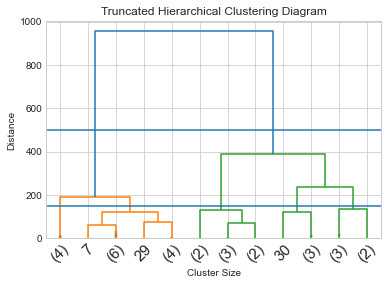

In [13]:
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45, 
           leaf_font_size=15, show_contracted=True)
plt.title('Truncated Hierarchical Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

## Generating hierarchical clusters

In [15]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean',
                       linkage='ward')
Hclustering.fit(x)
sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [16]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean',
                       linkage='average')
Hclustering.fit(x)
sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [17]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan',
                       linkage='average')
Hclustering.fit(x)
sm.accuracy_score(y, Hclustering.labels_)

0.71875

#### Euclidean affinity with average and ward linkage is performing the best out of the tests